In [2]:
%cd ..

/Users/pedrobedmar/GoogleDrive/MASTER_BIG_DATA/tfm/code


In [3]:
from etl.esios.provider import ESIOSDataProvider
from etl.generic_provider import GenericDataProvider

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from sktime.utils.plotting import plot_series, plot_correlations
from matplotlib.pyplot import figure

In [4]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [5]:
esios_provider = ESIOSDataProvider()

esios_df_monthly =esios_provider.get_all_series(freq="H", start_index="2014-01-01 00:00", end_index="2023-03-31 23:59", resample_by="M", group_mode="mean")
esios_df_sum_monthly =esios_provider.get_all_series(freq="H", start_index="2014-01-01 00:00", end_index="2023-03-31 23:59", resample_by="M", group_mode="sum")

In [6]:
esios_spot_monthly = esios_df_monthly["PRECIO_MERCADO_SPOT_DIARIO"]
esios_demand_monthly = esios_df_sum_monthly["DEMANDA_REAL"]

<AxesSubplot:xlabel='DATE'>

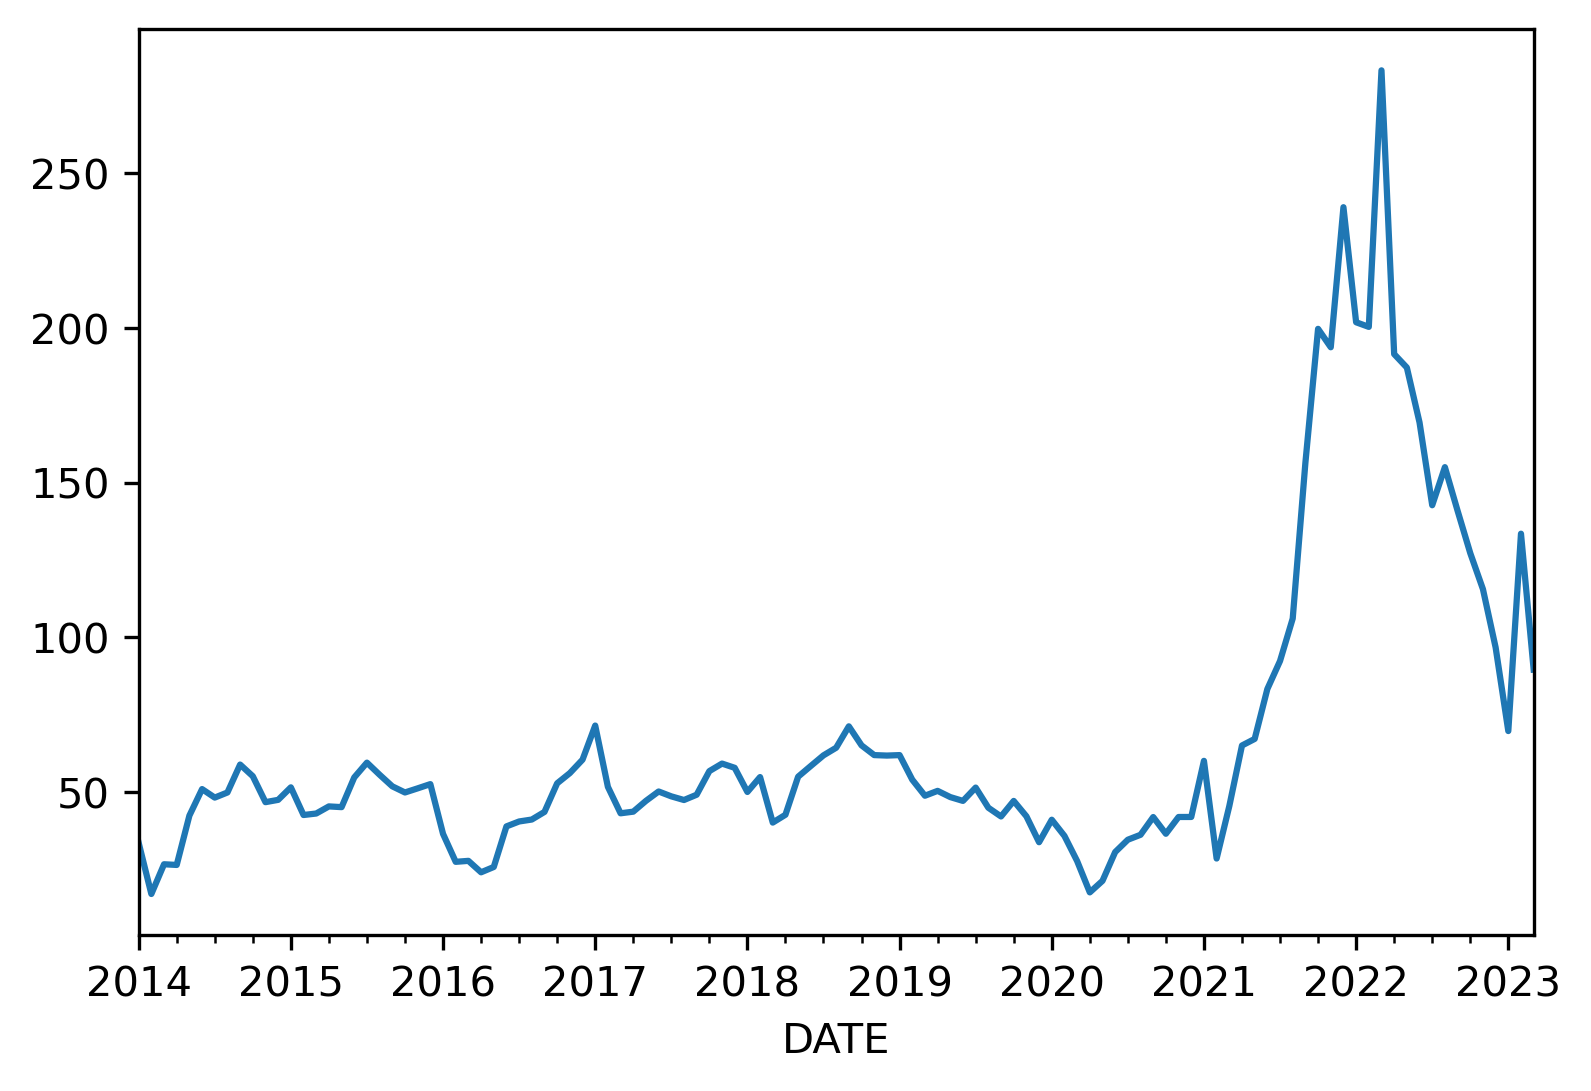

In [7]:
esios_spot_monthly.plot()

(<Figure size 3600x2400 with 3 Axes>,
 array([<AxesSubplot:ylabel='PRECIO_MERCADO_SPOT_DIARIO'>,
        <AxesSubplot:title={'center':'Autocorrelation'}>,
        <AxesSubplot:title={'center':'Partial Autocorrelation'}>],
       dtype=object))

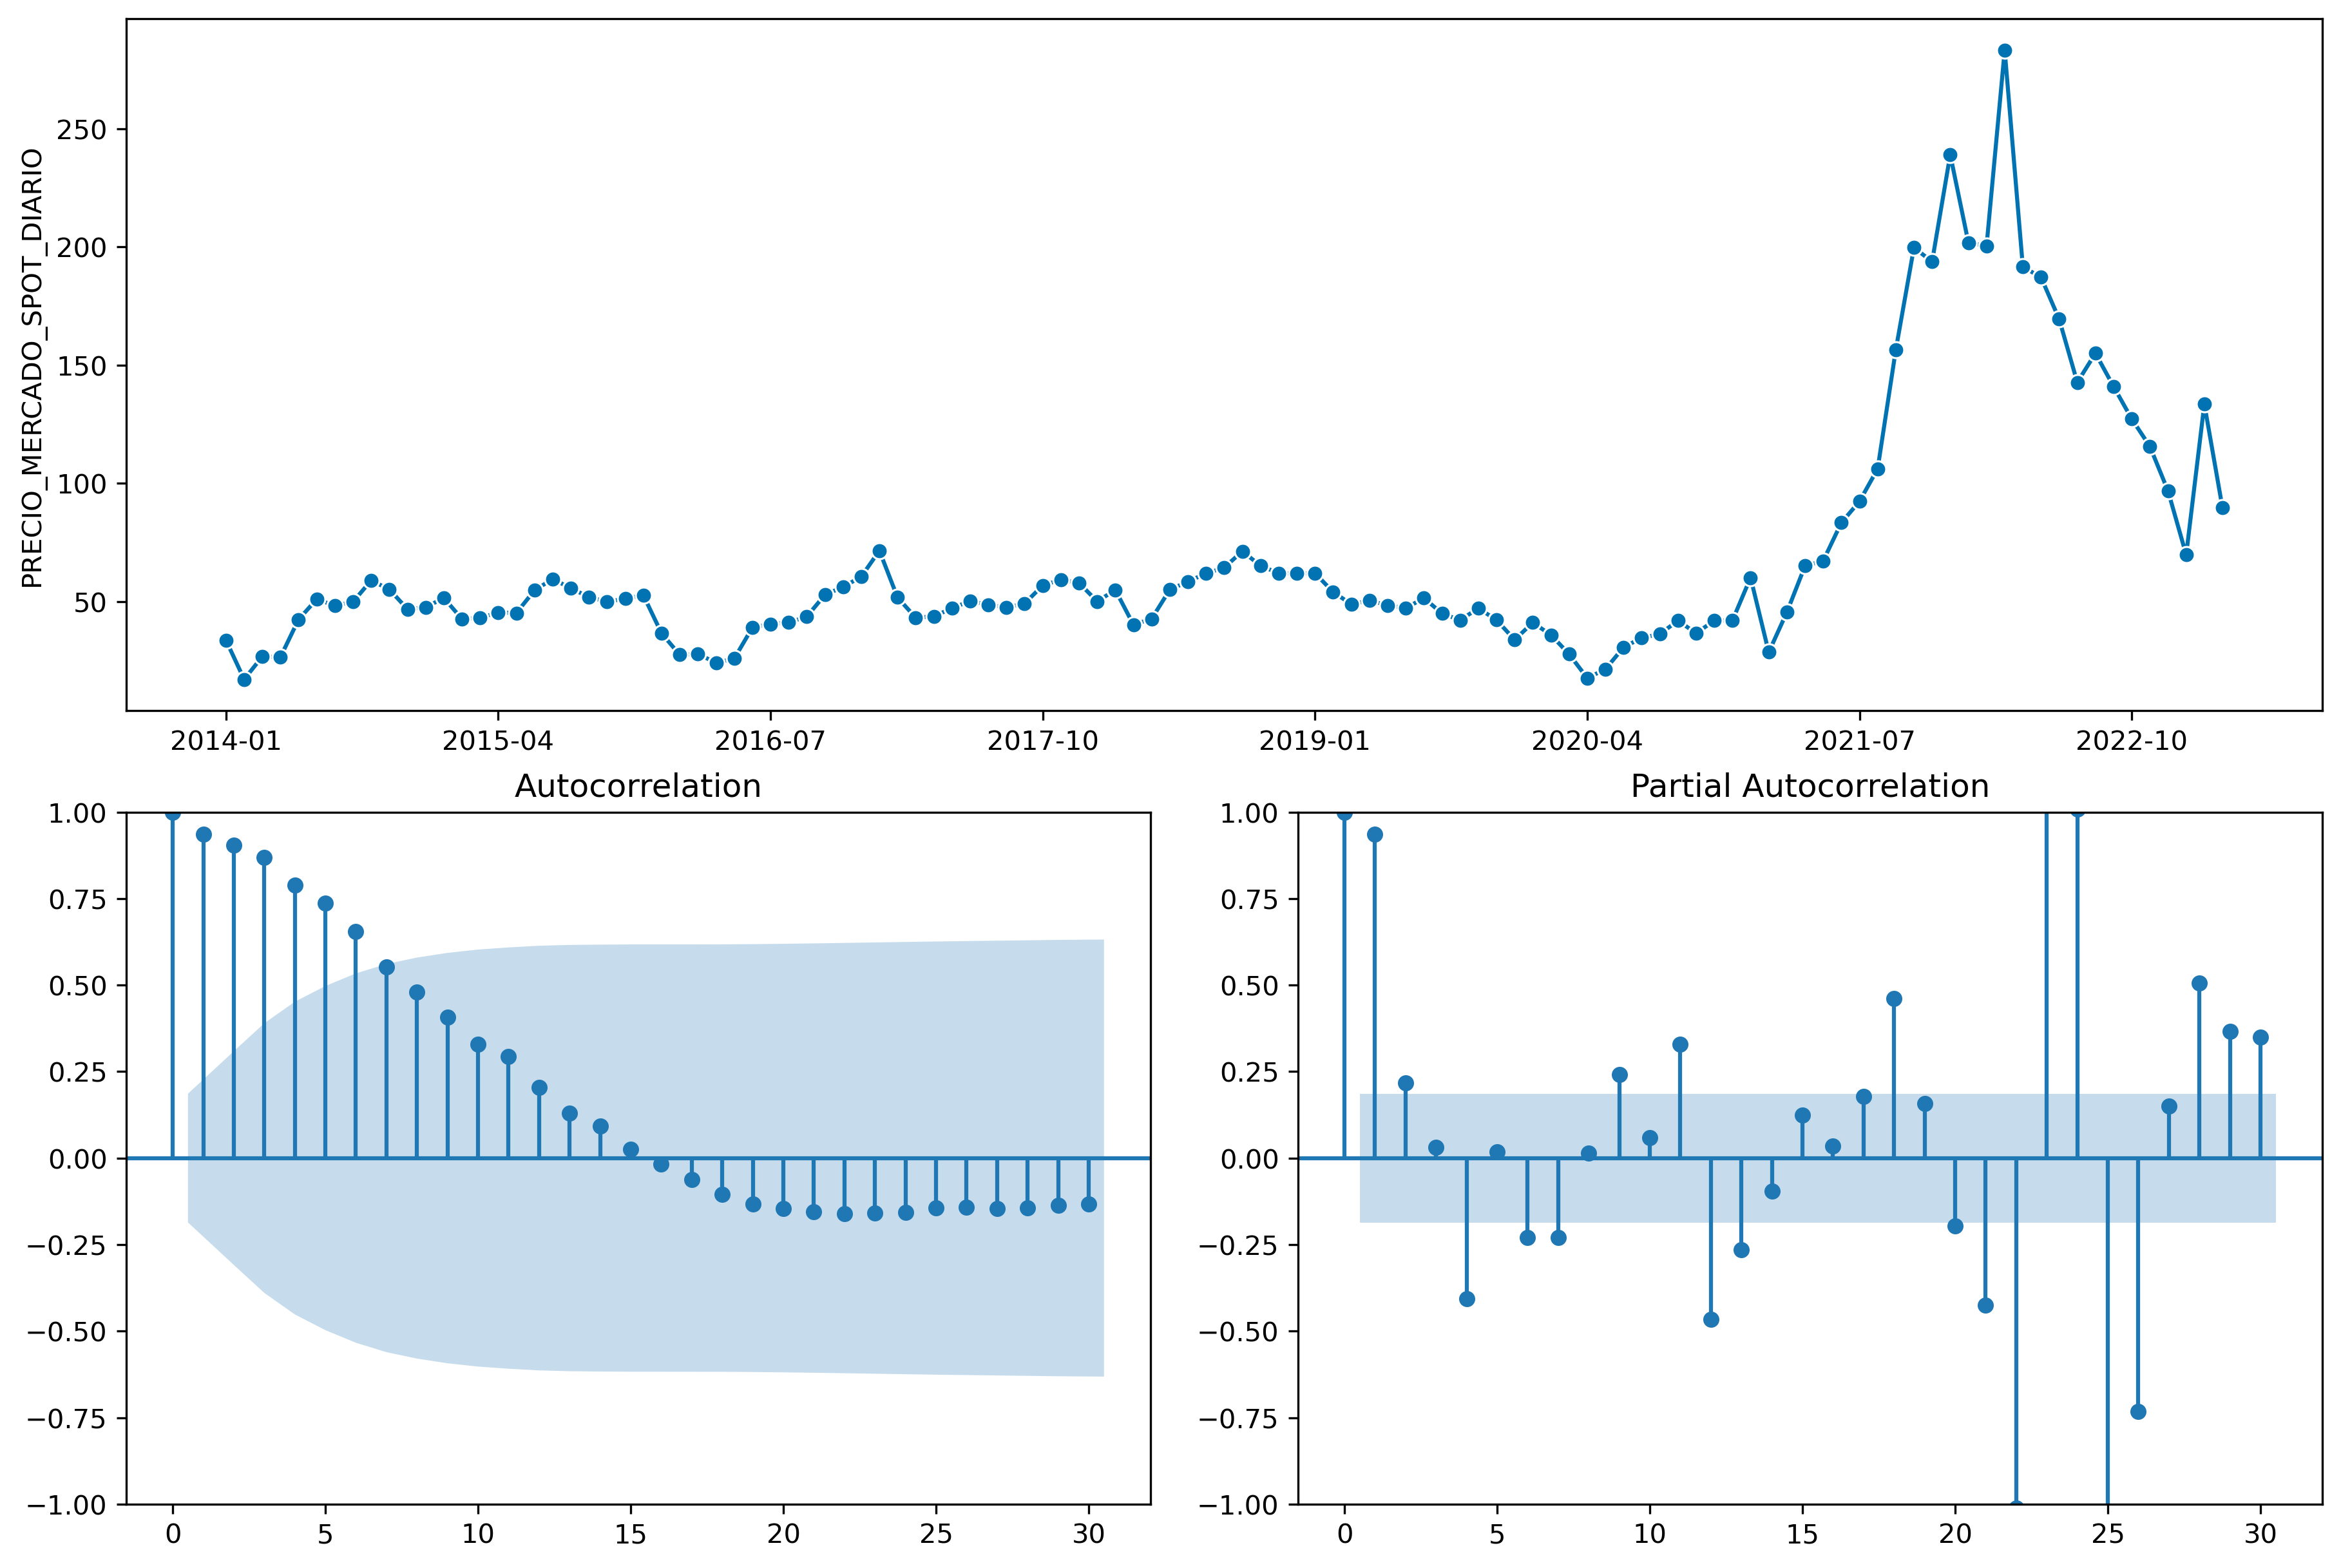

In [8]:
plot_correlations(esios_spot_monthly, lags=30)

<AxesSubplot:xlabel='DATE'>

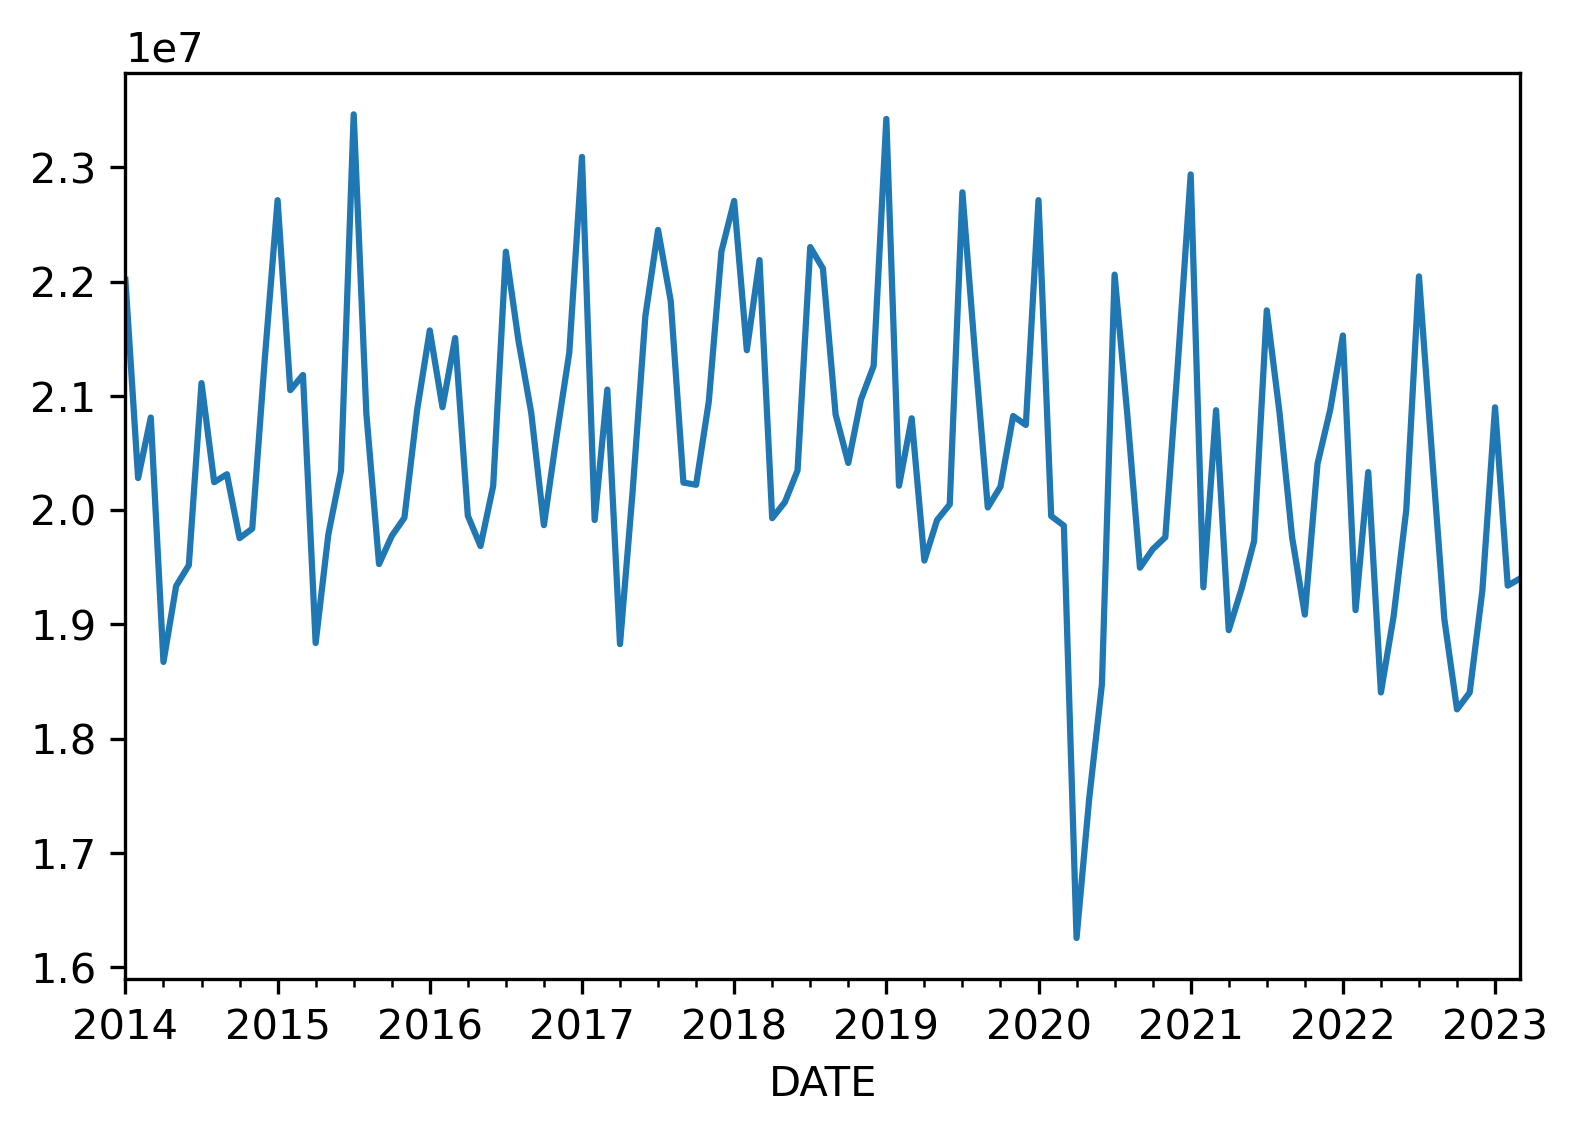

In [9]:
esios_demand_monthly.plot()

['GENERACIÓN_MEDIDA_TOTAL', 'GENERACIÓN_MEDIDA_EÓLICA', 'GENERACIÓN_MEDIDA_HIDRÁULICA', 'GENERACIÓN_MEDIDA_NUCLEAR', 'GENERACIÓN_MEDIDA_SOLAR', 'GENERACIÓN_MEDIDA_CICLO_COMBINADO', 'GENERACIÓN_MEDIDA_CARBÓN']


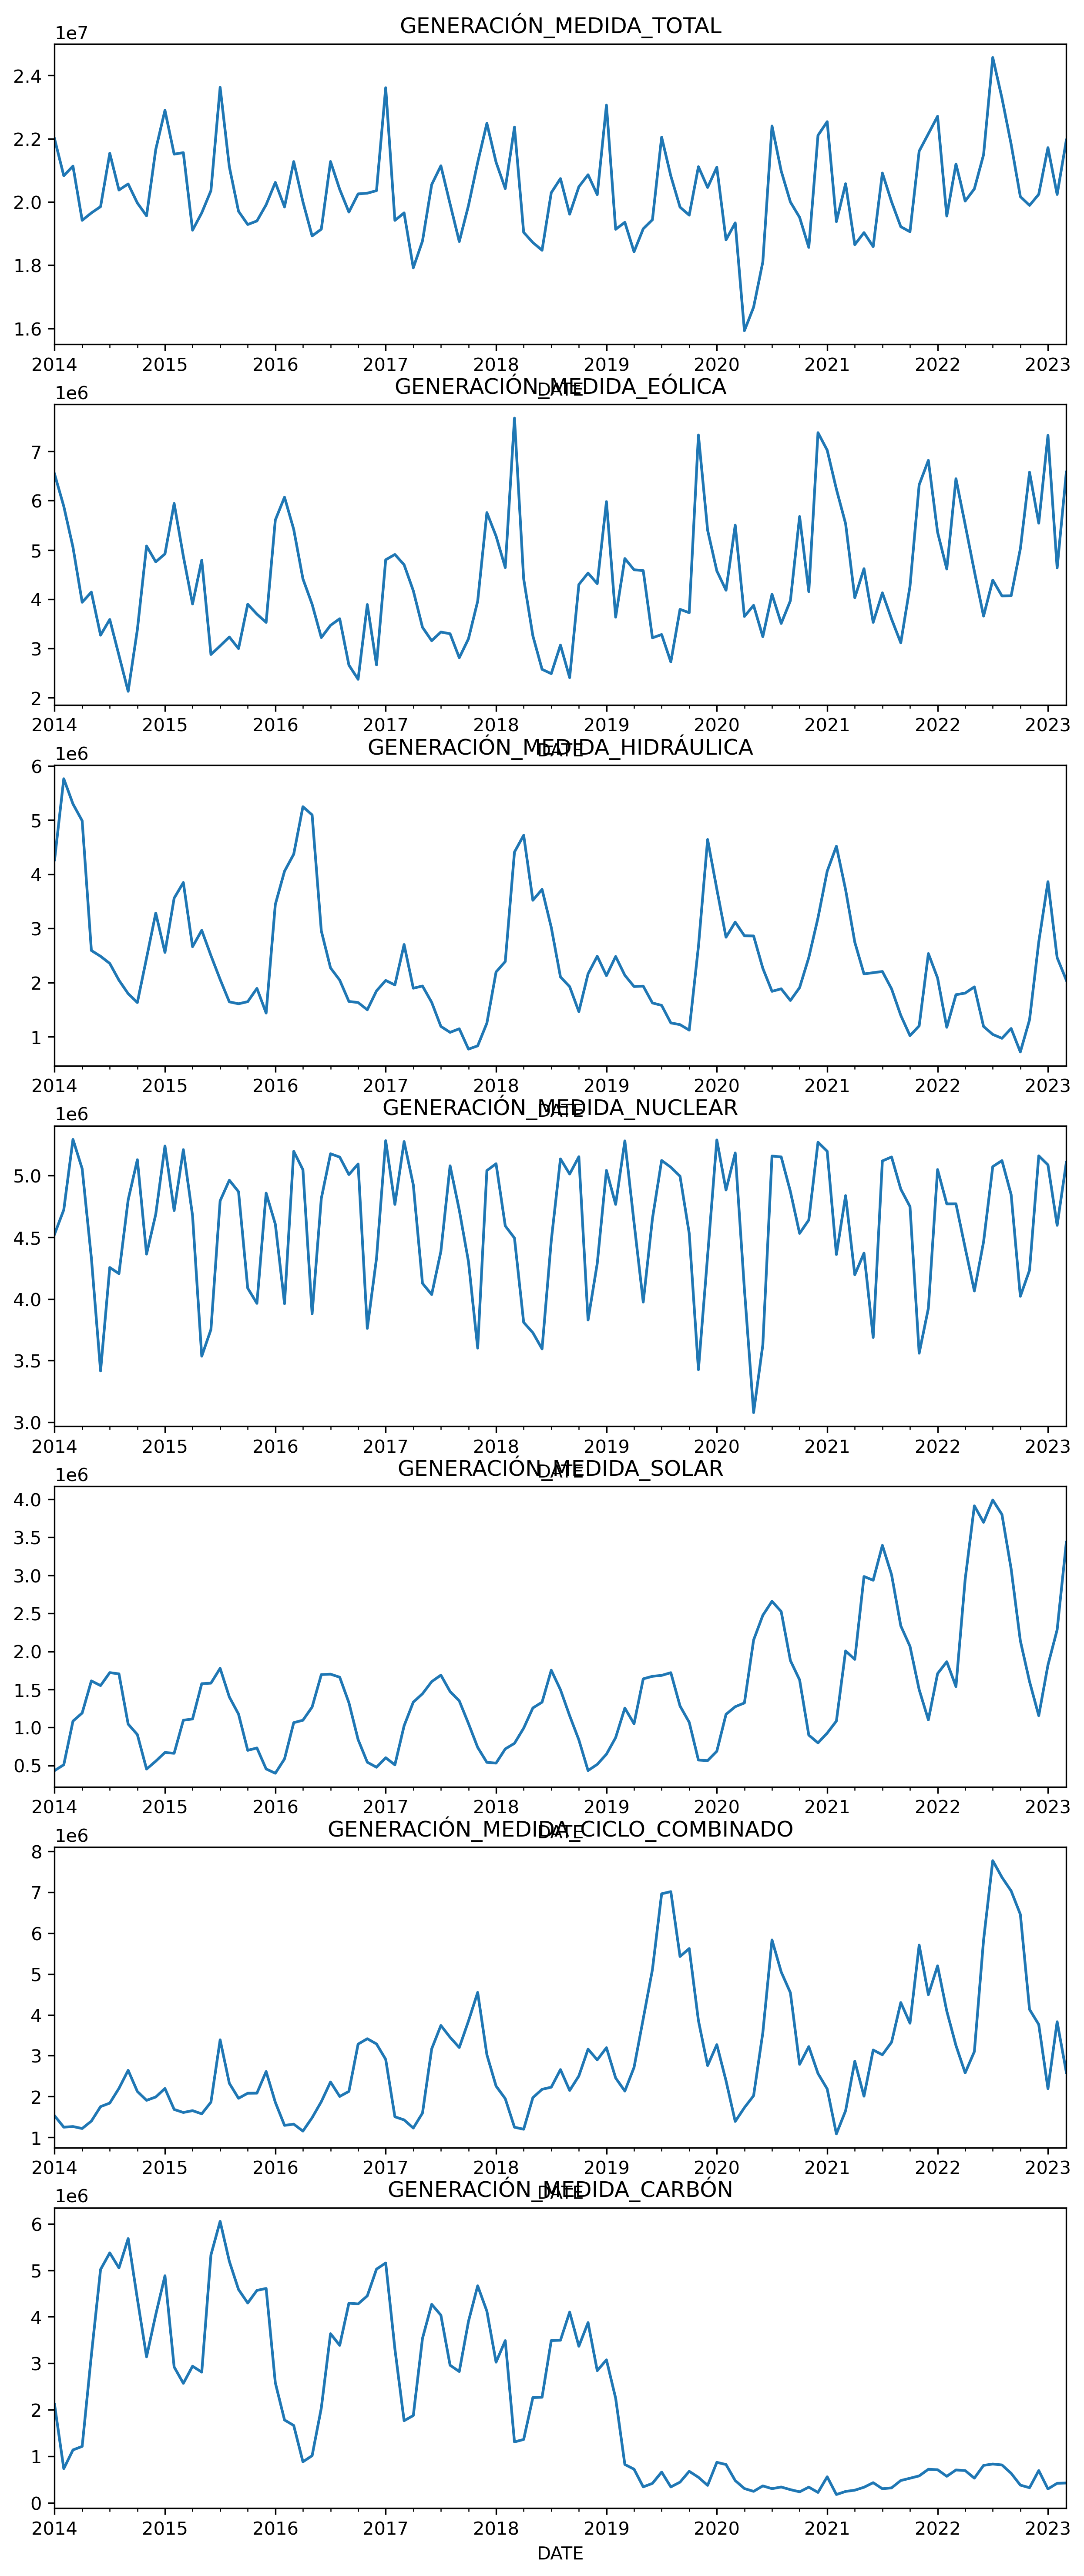

In [37]:
generation_technologies = esios_provider.get_tickers()[1:-1]
print(generation_technologies)

fig, axes = plt.subplots(nrows=len(generation_technologies))
for i, name in enumerate(generation_technologies):
    esios_df_sum_monthly.iloc[:,i+1].plot(figsize=(10, 25), ax=axes[i], title=name)

In [38]:
tickers = ["DAILY_TTF_PRICE", "MONTHLY_TTF_PRICE"]
ttf_daily_provider = GenericDataProvider("datalake/clean/investingdotcom/", want_metadata=False, tickers=tickers)

ttf_price_monthly = ttf_daily_provider.get_series("MONTHLY_TTF_PRICE", freq="M")

Text(0.5, 1.0, 'TTF gas price (per month)')

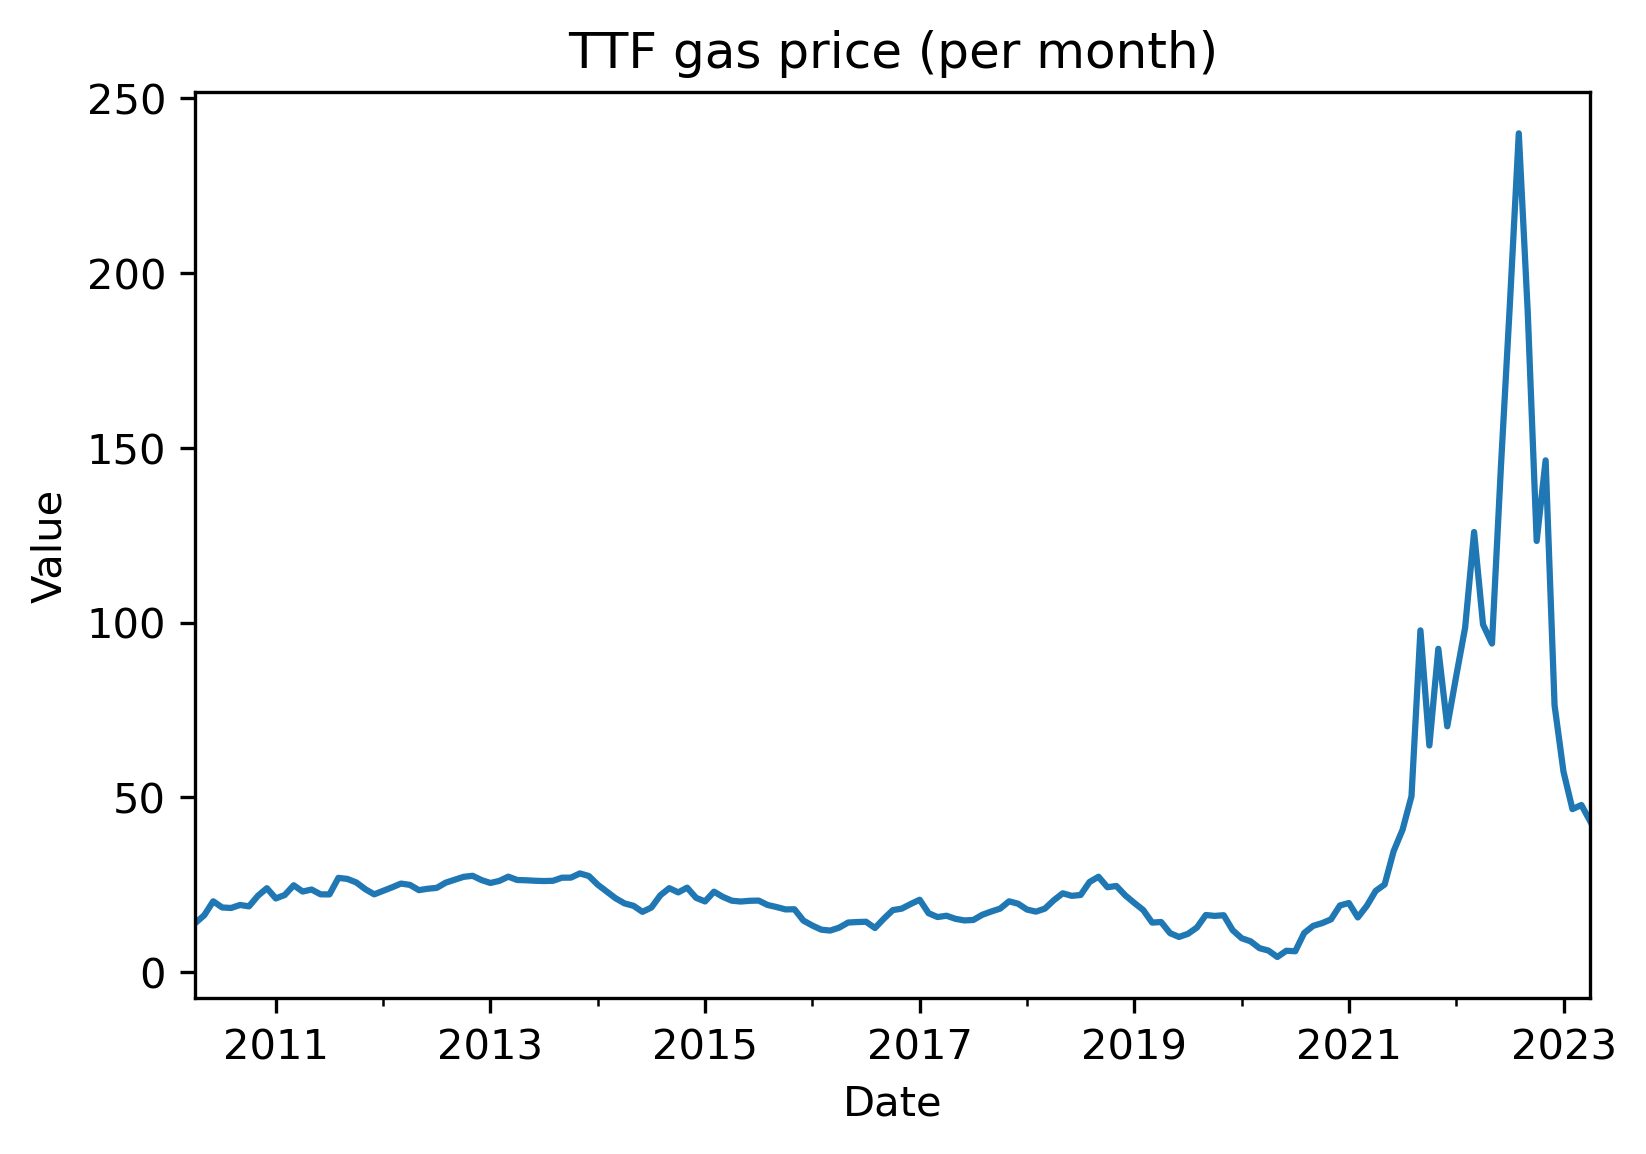

In [39]:
ax = ttf_price_monthly.plot()
ax.set_xlabel("Date")
ax.set_ylabel("Value")
ax.set_title("TTF gas price (per month)")

In [42]:
coal_daily_provider = GenericDataProvider("datalake/clean/marketwatch/", want_metadata=False, tickers="DAILY_COAL_PRICE")

coal_price_monthly = coal_daily_provider.get_series("DAILY_COAL_PRICE", freq="D", resample_by="M", group_mode="mean")

<AxesSubplot:xlabel='DATE'>

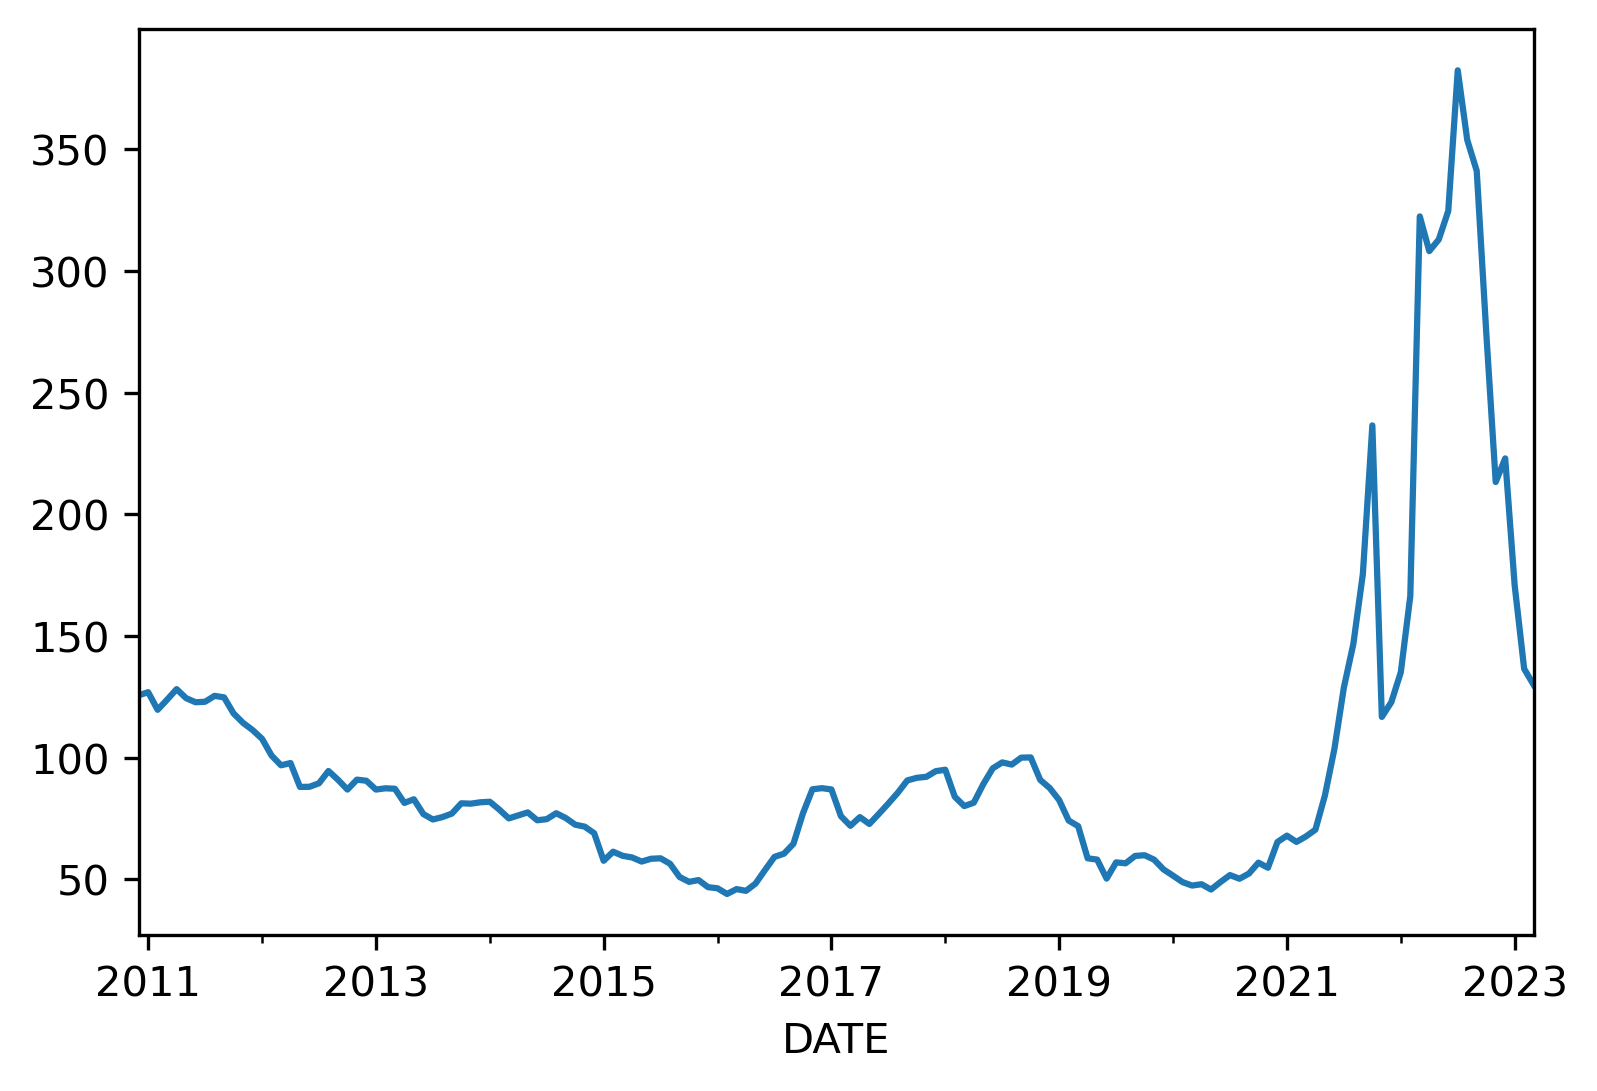

In [43]:
coal_price_monthly.plot()

In [44]:
co2_daily_provider = GenericDataProvider("datalake/clean/ICAP/", want_metadata=False, tickers="CO2_EUA_PRICE")

co2_price_monthly = co2_daily_provider.get_series("CO2_EUA_PRICE", freq="D", resample_by="M", group_mode="mean")

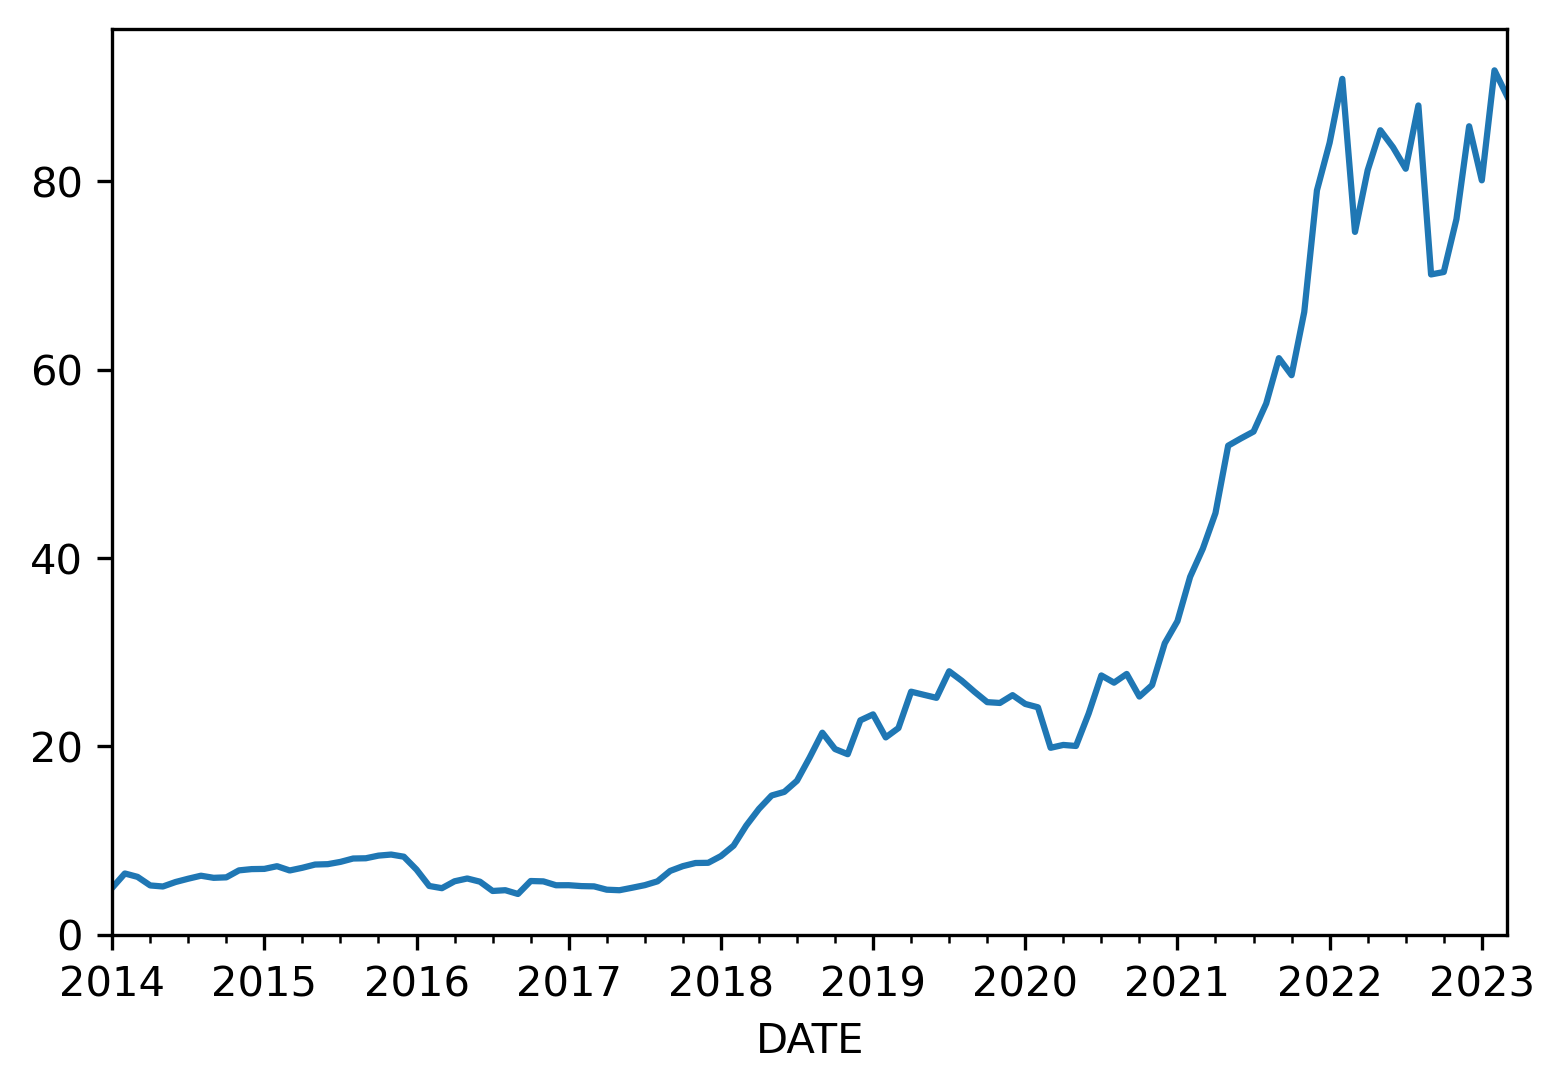

In [45]:
ax = co2_price_monthly.loc['2014-01-01':'2023-03-01'].plot()

In [14]:
co2_price_monthly.tail()

DATE
2022-11    75.982333
2022-12    85.852258
2023-01    80.109032
2023-02    91.790357
2023-03    89.041613
Freq: M, Name: CO2_EUA_PRICE, dtype: float64